<a href="https://colab.research.google.com/github/petrusthelastking/TANDANG_GAWE_KUIS_ULO-PYTHON-/blob/main/JS06_Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [25]:
# import package
import numpy as np
import pandas as pd
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Praktikum 1

## Baca Data

In [3]:
# baca data dari file CSV
data = pd.read_csv('iris (3).csv')

## Pemahaman Terhadap Data

In [4]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualisasi Data

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


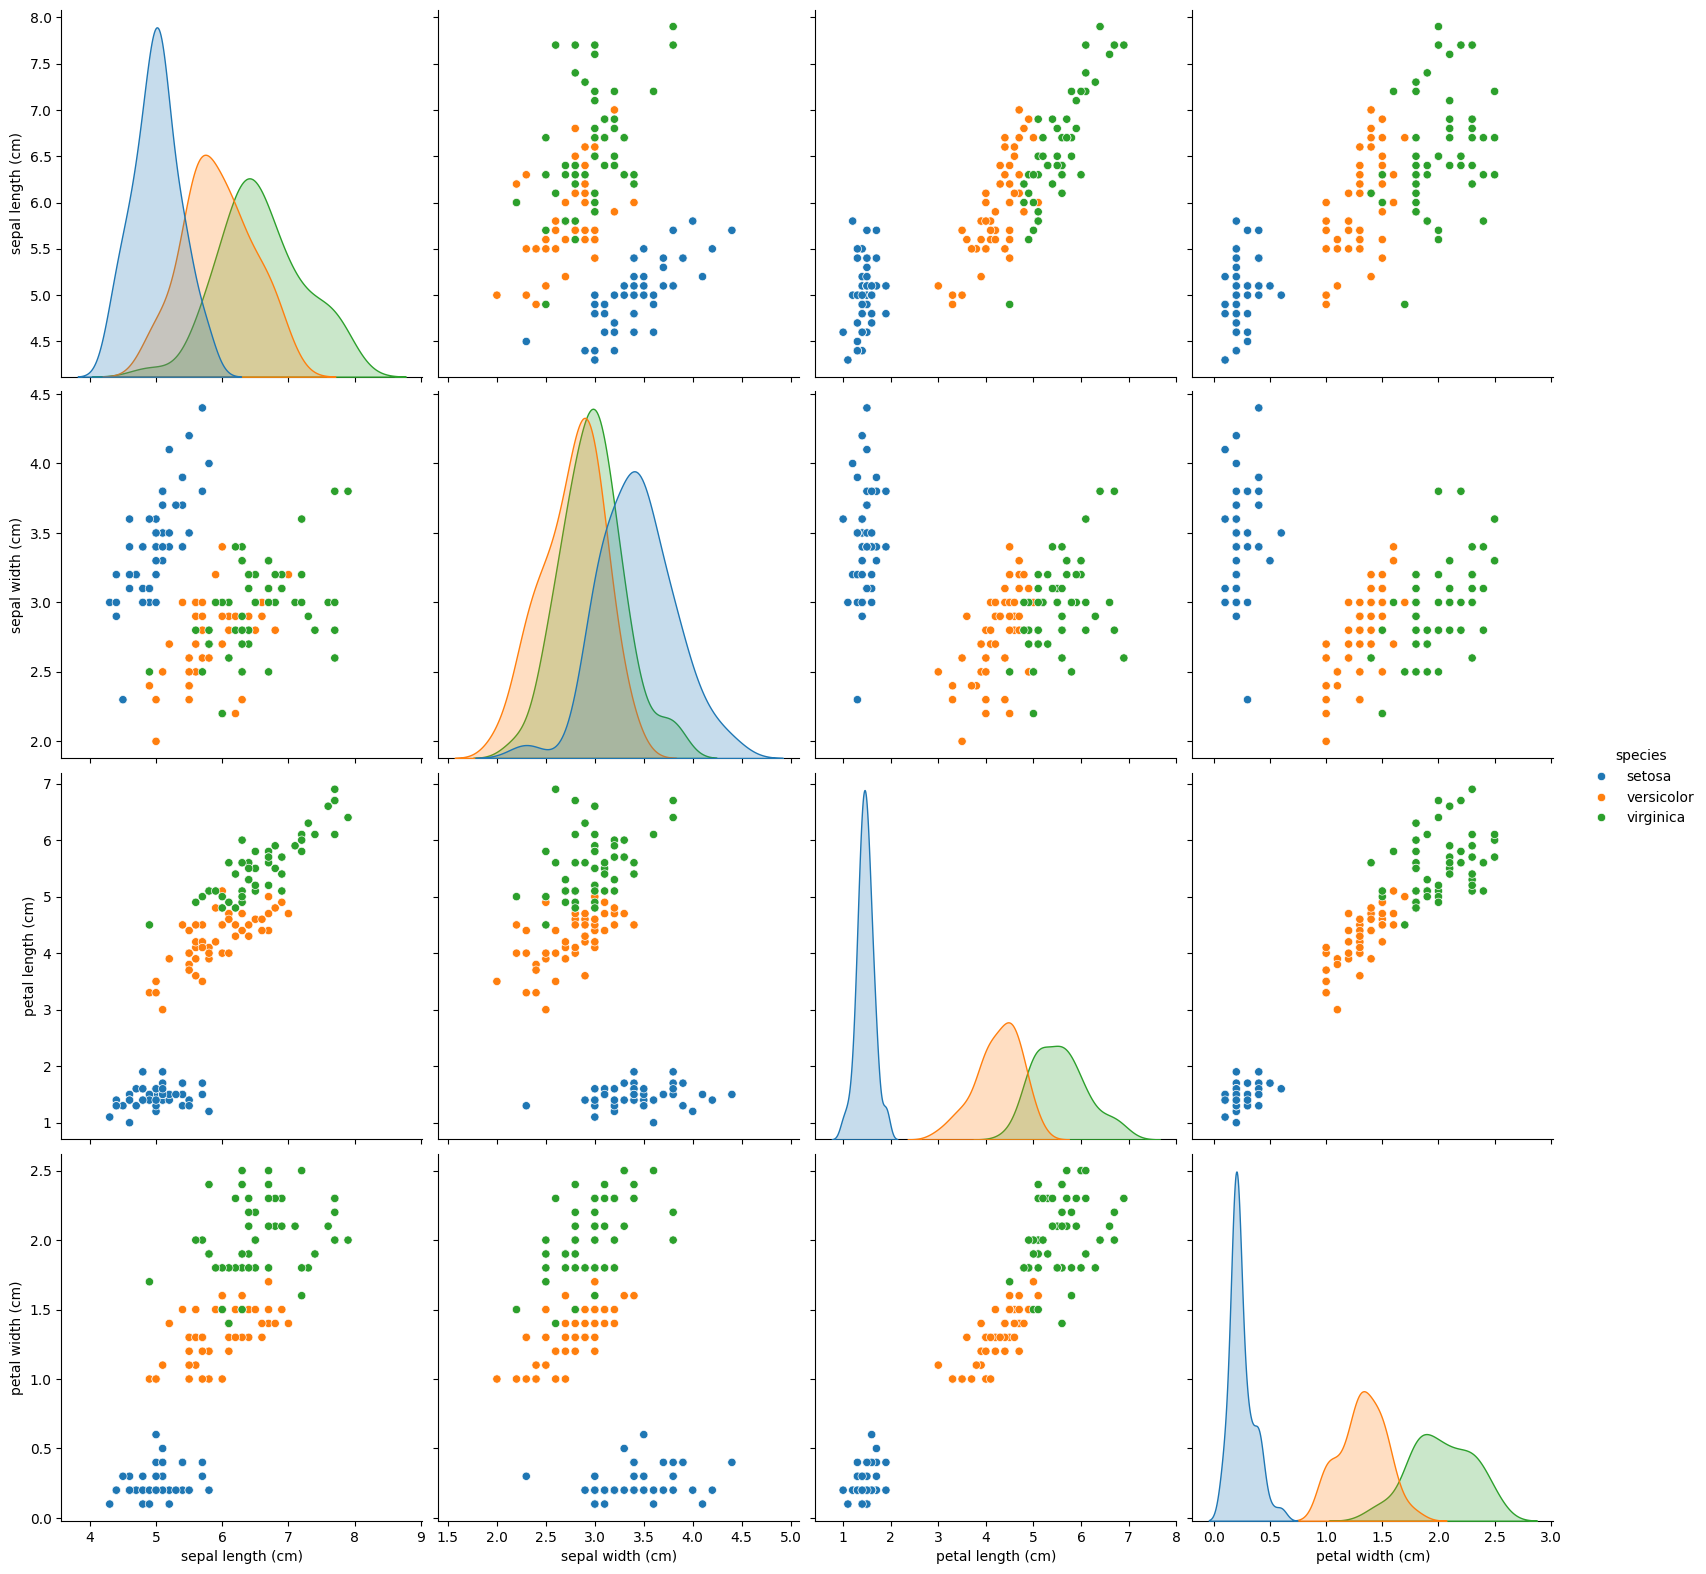

In [11]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
             y_vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
             size=4, aspect=1, kind='scatter', hue='species')
plt.show()

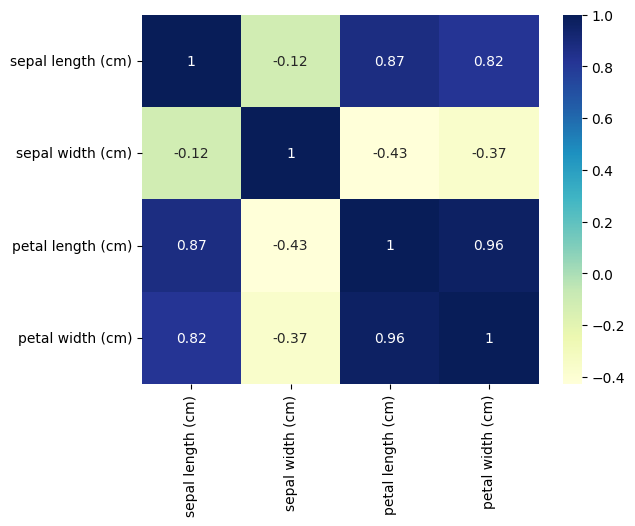

In [13]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.drop('species', axis=1).corr(), cmap="YlGnBu", annot=True)
plt.show()

## Regresi Linier

In [15]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['petal length (cm)']
y = data['petal width (cm)']

In [16]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [18]:
# Training model

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

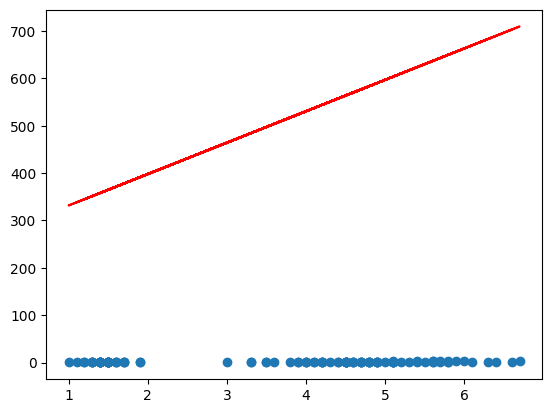

In [19]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

## Analisis Residual

In [20]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

/tmp/ipython-input-594495671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


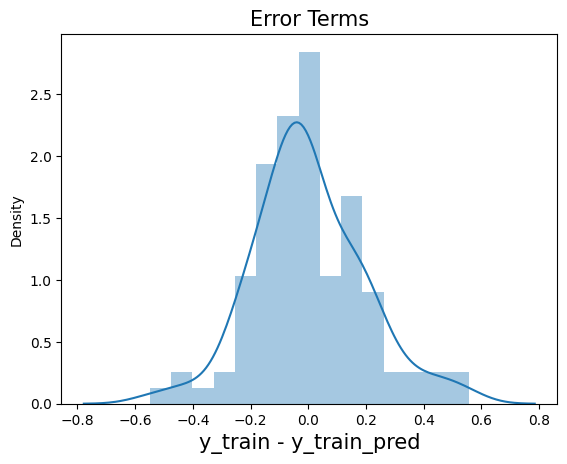

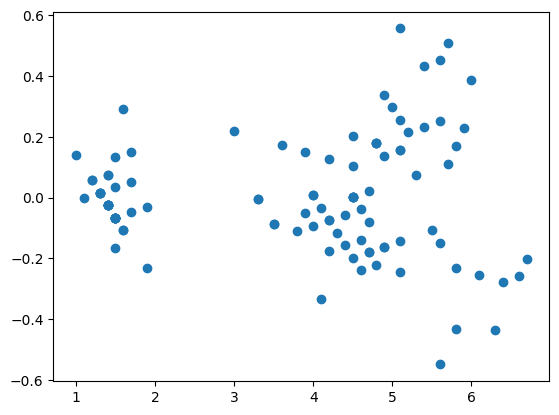

In [21]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

## Prediksi pada Data Uji dan Evaluasi *Model*

In [22]:
# Prediksi pada data uji
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

In [23]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)

## Visualisasi Hasil

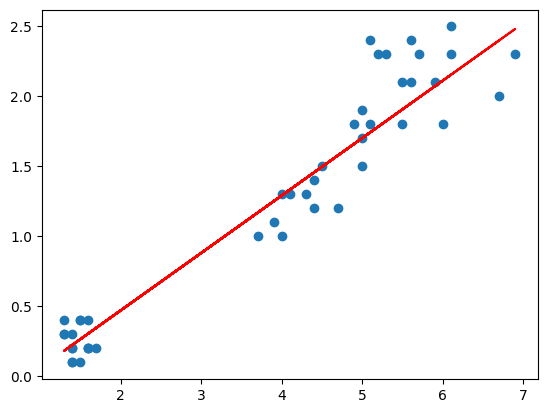

In [24]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Praktikum2

## Mengimpor Dataset:

In [27]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja

## Feature Scaling

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

## Fitting SVR ke Dataset

In [29]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Visualisasi Hasil SVR

/tmp/ipython-input-1841224750.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)


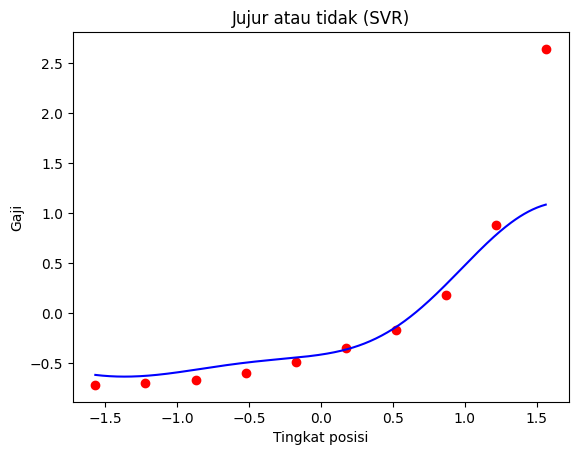

In [30]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

## Prediksi Hasil

In [31]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

## Menampilkan Hasil

In [32]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


## Evaluasi Model SVR

In [33]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798


# TUGAS

## Memuat dan memahami data

### Subtask:
Muat dataset 'insurance.csv' ke dalam Pandas DataFrame dan tampilkan informasi dasar tentang dataset, termasuk tipe data dan statistik deskriptif.


In [34]:
df_insurance = pd.read_csv('insurance.csv')
print("First 5 rows of the dataset:")
display(df_insurance.head())
print("\nDataset Information:")
df_insurance.info()
print("\nDataset Descriptive Statistics:")
display(df_insurance.describe())

First 5 rows of the dataset:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Dataset Descriptive Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Pemilihan variabel

### Subtask:
Identifikasi variabel bebas (fitur) dan variabel target (biaya medis personal) dari dataset `df_insurance`.


In [35]:
X = df_insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df_insurance['charges']
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (1338, 6)
Target (y) shape: (1338,)


## Pembagian data

### Subtask:
Bagi dataset `X` dan `y` menjadi set pelatihan dan pengujian menggunakan `train_test_split`.


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)
Shape of y_train: (1070,)
Shape of y_test: (268,)


## Feature scaling

### Subtask:
Lakukan feature scaling pada variabel bebas `X_train` dan `X_test` jika diperlukan.


In [37]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

scaler = StandardScaler()

X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled_numeric = scaler.transform(X_test[numeric_cols])

X_train_scaled_df = pd.DataFrame(X_train_scaled_numeric, columns=numeric_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled_numeric, columns=numeric_cols, index=X_test.index)

X_train = pd.concat([X_train_scaled_df, X_train[categorical_cols]], axis=1)
X_test = pd.concat([X_test_scaled_df, X_test[categorical_cols]], axis=1)

print("X_train after scaling:")
display(X_train.head())
print("\nX_test after scaling:")
display(X_test.head())

X_train after scaling:


,age,bmi,children,sex,smoker,region
560,0.472227,-1.756525,0.734336,female,no,northwest
1285,0.543313,-1.033082,-0.911192,female,no,northeast
1142,0.898745,-0.943687,-0.911192,female,no,southeast
969,-0.025379,0.622393,3.202629,female,no,southeast
486,1.040918,-1.504893,1.557100,female,no,northwest



X_test after scaling:


,age,bmi,children,sex,smoker,region
764,0.401140,-0.891539,0.734336,female,no,northeast
887,-0.238638,-0.089461,-0.911192,female,no,northwest
890,1.751782,-0.608453,-0.911192,female,yes,northwest
1293,0.472227,-0.797177,1.557100,male,no,northwest
259,-1.447107,0.225079,-0.911192,male,yes,northwest


## Pembuatan dan pelatihan model

### Subtask:
Buat model multiple linear regression menggunakan Scikit-Learn dan latih model menggunakan data latih `X_train` dan `y_train`.


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = X_train.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

model = LinearRegression()

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('regressor', LinearRegression())])

## Prediksi

### Subtask:
Lakukan prediksi pada data uji `X_test` menggunakan model multiple linear regression yang telah dilatih.


In [40]:
y_pred = pipeline.predict(X_test)

## Evaluasi model

### Subtask:
Evaluasi kinerja model multiple linear regression menggunakan metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Absolute Error (MAE): 4181.1944737536505
Mean Squared Error (MSE): 33596915.85136147
R-squared (R2 ): 0.7835929767120723


## Visualisasi (optional)

### Subtask:
Buat visualisasi yang relevan untuk memahami hubungan antar variabel atau hasil prediksi.


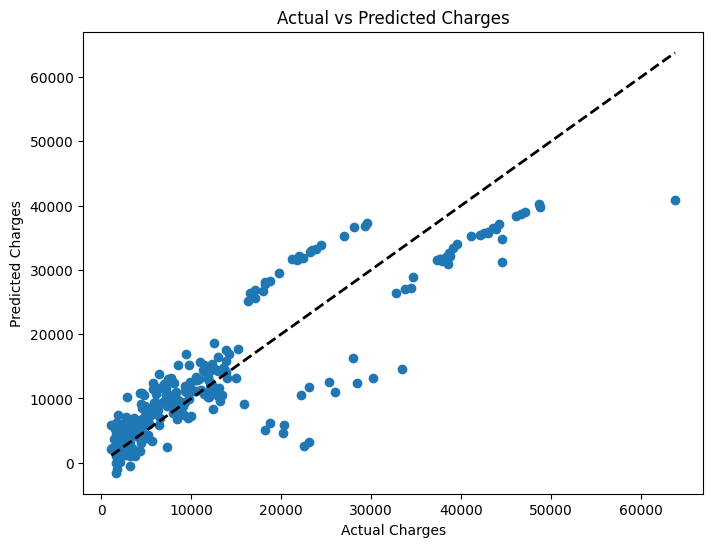

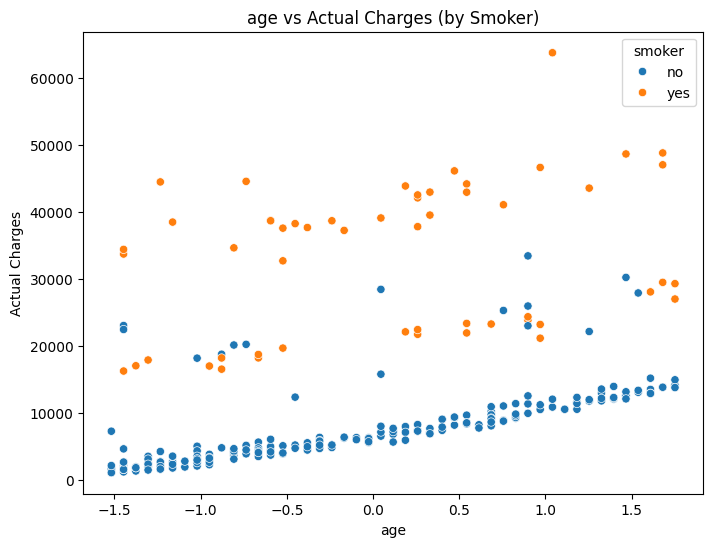

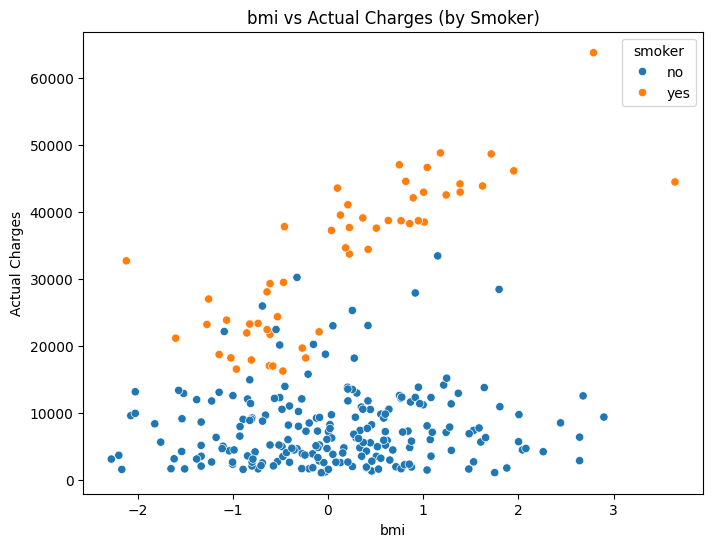

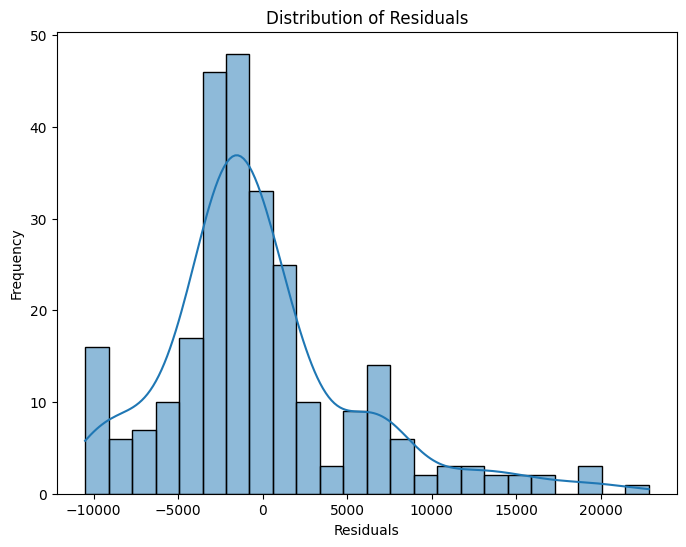

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

numeric_features_to_plot = ['age', 'bmi']
for feature in numeric_features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=X_test, x=feature, y=y_test, hue=X_test['smoker'])
    plt.title(f'{feature} vs Actual Charges (by Smoker)')
    plt.xlabel(feature)
    plt.ylabel('Actual Charges')
    plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Analisis hasil

### Subtask:
Berikan analisis singkat tentang hasil regresi linear berganda berdasarkan metrik evaluasi dan visualisasi yang telah dihasilkan.


In [43]:
# Based on the R-squared value, explain how well the model predicts personal medical expenses.
print(f"R-squared: {r2:.4f}")
print(f"Interpretation: The R-squared value of {r2:.4f} indicates that approximately {r2*100:.2f}% of the variance in personal medical charges can be explained by the features included in the model. A higher R-squared value suggests a better fit of the model to the data.")

# Based on the MAE and MSE values, explain the accuracy of the model's predictions.
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Interpretation of MAE and MSE: The MAE of {mae:.2f} means, on average, the model's predictions are off by around ${mae:.2f}. The MSE of {mse:.2f} gives more weight to larger errors. Both metrics provide a measure of the prediction error, with lower values indicating higher accuracy.")

# Based on the "Actual vs Predicted Charges" scatter plot, discuss any patterns or deviations seen and what they mean for model performance.
print("\nAnalysis of Actual vs Predicted Charges Scatter Plot:")
print("Observation: The scatter plot shows a general linear trend between actual and predicted charges, indicating that the model captures some of the relationship. However, there is significant scatter around the ideal diagonal line, especially at higher charge values. There are also some instances where the model underpredicts high charges and overpredicts low charges.")
print("Implication for Model Performance: The scatter suggests that while the model has learned the overall trend, it struggles to accurately predict individual charges, particularly for individuals with very high medical costs. The spread indicates that factors not fully captured by the current features might be influencing the charges.")

# Based on the scatter plots of numerical features vs. Actual Charges (by Smoker), explain the relationships between these features, smoking status, and medical charges.
print("\nAnalysis of Numerical Features vs Actual Charges (by Smoker) Scatter Plots:")
print("Age vs Charges: There is a general positive trend between age and medical charges. Older individuals tend to have higher medical costs. Smokers consistently have significantly higher medical charges across all age groups compared to non-smokers.")
print("BMI vs Charges: The relationship between BMI and charges is less clear-cut than age. While there's a slight positive trend, it's not as pronounced. However, similar to age, smokers with higher BMIs tend to have much higher charges than non-smokers.")
print("Interpretation: Smoking status is a dominant factor influencing medical charges, often leading to substantially higher costs regardless of age or BMI. Age also plays a significant role, with costs increasing with age. BMI's relationship with charges appears to be influenced by smoking status.")

# Based on the residual histogram, explain the distribution of model errors and if there are any indications of linear regression assumption problems.
print("\nAnalysis of Residual Histogram:")
print("Observation: The histogram of residuals shows a somewhat skewed distribution, with a tail extending towards the positive values. This suggests that the model tends to underpredict more often than it overpredicts, especially for higher charge values. Ideally, residuals should be normally distributed around zero.")
print("Indication of Assumption Problems: The skewed distribution of residuals might indicate that the assumption of normally distributed errors in linear regression is violated. This could be due to the nature of the 'charges' variable, which is likely not normally distributed itself and has a lower bound of zero. Heteroscedasticity (non-constant variance of errors) might also be present, as suggested by the scatter in the Actual vs Predicted plot increasing with higher charges.")

# Provide a brief conclusion on the strengths and weaknesses of the multiple linear regression model built to predict medical charges.
print("\nConclusion:")
print("Strengths: The model captures a significant portion of the variability in medical charges (R-squared ~78%) and identifies key factors like smoking status and age as important predictors.")
print("Weaknesses: The model's accuracy is limited, as indicated by the MAE and MSE. It struggles to predict higher charges accurately and the residual analysis suggests potential violations of linear regression assumptions, particularly regarding the distribution of errors and possibly heteroscedasticity. The model might benefit from including interaction terms or considering a different modeling approach that can better handle the skewed nature of the target variable and the heteroscedasticity.")

R-squared: 0.7836
Interpretation: The R-squared value of 0.7836 indicates that approximately 78.36% of the variance in personal medical charges can be explained by the features included in the model. A higher R-squared value suggests a better fit of the model to the data.

Mean Absolute Error (MAE): 4181.19
Mean Squared Error (MSE): 33596915.85
Interpretation of MAE and MSE: The MAE of 4181.19 means, on average, the model's predictions are off by around $4181.19. The MSE of 33596915.85 gives more weight to larger errors. Both metrics provide a measure of the prediction error, with lower values indicating higher accuracy.

Analysis of Actual vs Predicted Charges Scatter Plot:
Observation: The scatter plot shows a general linear trend between actual and predicted charges, indicating that the model captures some of the relationship. However, there is significant scatter around the ideal diagonal line, especially at higher charge values. There are also some instances where the model underp

## Ringkasan:

### Data Analysis Key Findings

* Dataset terdiri dari 1338 entri dengan kolom untuk usia, jenis kelamin, BMI, jumlah anak, status perokok, wilayah, dan biaya. Tidak ada nilai yang hilang.
* Variabel target 'charges' merepresentasikan biaya medis personal.
* Dataset dibagi menjadi set pelatihan 80% (1070 sampel) dan set pengujian 20% (268 sampel).
* Fitur numerik ('age', 'bmi', 'children') diskalakan menggunakan `StandardScaler`, sementara fitur kategorikal ('sex', 'smoker', 'region') tetap sebagai objek sebelum di-one-hot encode di dalam pipeline.
* Model regresi linear berganda mencapai nilai R-squared sebesar 0.7836 pada set pengujian, menunjukkan bahwa sekitar 78.36% variabilitas biaya medis dapat dijelaskan oleh fitur-fitur dalam model.
* Mean Absolute Error (MAE) adalah $4181.19, artinya rata-rata kesalahan prediksi sekitar jumlah ini.
* Mean Squared Error (MSE) adalah 33,596,915.85, memberikan bobot lebih pada kesalahan prediksi yang lebih besar.
* Visualisasi menunjukkan tren linear positif antara biaya aktual dan prediksi, tetapi dengan sebaran yang signifikan, terutama untuk biaya yang lebih tinggi.
* Status perokok adalah prediktor kuat untuk biaya medis yang tinggi. Usia juga menunjukkan hubungan positif dengan biaya.
* Distribusi residual condong ke kanan (right-skewed), menunjukkan model cenderung melakukan underpredict dan berpotensi melanggar asumsi kesalahan yang terdistribusi normal.

### Wawasan atau Langkah Selanjutnya

* Model menangkap sebagian besar varians biaya medis, dengan status perokok dan usia sebagai prediktor kunci. Namun, akurasinya dapat ditingkatkan, terutama untuk memprediksi biaya tinggi.
* Langkah selanjutnya dapat mencakup eksplorasi transformasi variabel target (misalnya, transformasi logaritmik) untuk mengatasi distribusi residual yang condong dan potensi heteroskedastisitas, atau mempertimbangkan teknik regresi yang lebih canggih.